# JPEG Compersion 

In [ ]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from scipy.fftpack import dct, idct
!git clone https://github.com/parhambt/Using-Linear-Algebra-in-simple-Image-Processing-for-Calc2.git

## Matter of Image Compersion Algorithm

<div dir="rtl">
    الگوریتم های فشرده سازی اعم از الگوریتم های فشرده سازی تصاویر بسیار مهم هستند چون امروزه بخشه زیادی از دیتای موجود در وب از نوع تصاویر هستن و اگر ما بخوایم تصاویر را بدون فشرده کردن ذخیره کنیم باید هزینه خیلی بیشتری صرفا برای ذخیره سازی کنیم ‌
</div>

## Type of Image Compersion Algorithm

<div dir="rtl">
    
</div>

<div dir="rtl">
ما برای Compress کردن تصاویر ۲ تا روش کلی داریم .1-lossy:روشی برای فشرده سازی است که مقداری از دیتای اولیه از دست میرود ۲-lossless: روشی برای فشرده سازی که هیچ دیتایی در حین فشرده سازی از دست نمیرود 

قبلا ما به فرمت YCbCr پرداختیم و اشاره کردیم که چشم انسان به شدت سیاه و سفیدی(Y) رنگ حساس تر از بخش رنگی تصویر هست (Cb/Cr) بنابر این اگر ما بخواهیم تصاویر را با روش lossy فشرده سازی کنیم میتوانیم بخش ها رنگی تصویر را بیشتر از بخش سیاه و سفید فشرده کنیم که چشم کمتر تفاوت رو متوجه شود‌
</div>

## How JPEG Compersion Works ?

<div dir="rtl">
    همانطور که بالاتر اشاره کردیم ما میخواهیم جزئیات بی اهمیت در تصاویر که چشم انسان قادر به دیدن آن ها نیست را حذف کنیم و اینگونه صرفه جویی در فضای ذخیره سازی کنیم . 
ما در گام اول مقادیر تصویر را از فضای YCbCr به فضای DCT میبریم . DCT مقادیر ماتریس را که در YCbCr به معنای میزان روشنایی آن پیکسل بود را به فرکانس تبدیل میکند که فرکانس های بالا به معنای جزئیات بی اهمیت هستند 
‌
</div>

<div dir="rtl">
    ما میدانیم برای بردن هر برداری به فضای خطی دیگری باید پایه(Basis) های فضای خطی جدید را داشته باشیم 
و برای بردن بردار به فضای خطی ما باید ضریب های متناظر هر پایه را پیدا کنیم تابع dct2 برای ما ضریب های متناظر با پایه رو بر میگردونه

</div>

![DCT_basis.png](https://raw.githubusercontent.com/parhambt/Using-Linear-Algebra-in-simple-Image-Processing-for-Calc2/refs/heads/master/Images/DCT_basis.png)


<div dir="rtl">
    ما پروسه فشرده کردن تصویر را با لغزاندن بلاک هایی ۸*۸ روی تصویر انجام میدهیم ( قبلا هم در تسک های پردازش تصویر به شما مفهومی شبیه که بلاکی روی تصویر میلغزد را استفاده کردیم که به آن Kernel یا Filter هم میگویند و از این ایده در خیلی از تسک های پردازش تصویر و هوش مصنوعی در بخش بینایی ماشین استفاده میشود )‌

</div>

<div dir="rtl">
    ما در این بلاک های لغزان روی تصویر DCT را حساب میکنیم و بعد فرکانس های بالای تصویر را بر یک عدد تقسیم میکنیم و رند میکنیم اینگونه مقدار زیادی از ماتریس که نشاندهنده جزئیات بی اهمیت هستند ۰ میشوند که این باعث فشرده سازی میشود 
که اگر دقت کنید ۲ ماتریس Q_C , Q_Y تعریف شده اند که مسئول این تقسیم هستند 
که همانطور که مشاهده میکنید هر چقدر ستون و سطر ماتریس افزایش میکند اعداد افزایش پیدا میکنند برای اینکه در پایه DCT هر چقدر در ماتریس به پایین و سمت راست تر (‌سطر و ستون افزایش میابد) میرویم فرکانس ها بیشتر میشود ( اطلاعات بی اهمیت ) برا همین ما میخواهیم بر اعداد بیشتری تقسیم شوند که وقتی رند میشوند با احتمال بیشتری ۰ شوند
</div>

![JPEG_FLOW.jpeg](https://raw.githubusercontent.com/parhambt/Using-Linear-Algebra-in-simple-Image-Processing-for-Calc2/refs/heads/master/Images/JPEG_FLOW.jpeg)


In [ ]:

Q_Y = np.array([
  [16,11,10,16,24,40,51,61],
  [12,12,14,19,26,58,60,55],
  [14,13,16,24,40,57,69,56],
  [14,17,22,29,51,87,80,62],
  [18,22,37,56,68,109,103,77],
  [24,35,55,64,81,104,113,92],
  [49,64,78,87,103,121,120,101],
  [72,92,95,98,112,100,103,99]
])
Q_C = np.array([
  [17,18,24,47,99,99,99,99],
  [18,21,26,66,99,99,99,99],
  [24,26,56,99,99,99,99,99],
  [47,66,99,99,99,99,99,99],
  [99,99,99,99,99,99,99,99],
  [99,99,99,99,99,99,99,99],
  [99,99,99,99,99,99,99,99],
  [99,99,99,99,99,99,99,99]
])


In [49]:
def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')



In [50]:
def jpeg_compress_channel(channel, Q):
    channel = np.float32(channel) - 128
    dct_quantized = block_process(channel, 8, lambda b: np.round(dct2(b) / Q))
    reconstructed = block_process(dct_quantized, 8, lambda b: idct2(b * Q))
    return np.clip(reconstructed + 128, 0, 255)



In [ ]:
def block_process(img, block_size, func):
    h, w = img.shape
    out = np.zeros_like(img, dtype=np.float32)
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = img[i:i+block_size, j:j+block_size]
            out[i:i+block_size, j:j+block_size] = func(block)
    return out


In [ ]:
# Load and convert image
root = "Using-Linear-Algebra-in-simple-Image-Processing-for-Calc2/"
image = Image.open(root+"Images/Ronaldo_bycicle_goal.jpg").convert("YCbCr")
y, cb, cr = [np.array(channel) for channel in image.split()]

# Compress channels
y_c = jpeg_compress_channel(y, Q_Y)
cb_c = jpeg_compress_channel(cb, Q_C)
cr_c = jpeg_compress_channel(cr, Q_C)

# Merge compressed channels
compressed_img = Image.merge("YCbCr", [Image.fromarray(y_c.astype(np.uint8)),
                                       Image.fromarray(cb_c.astype(np.uint8)),
                                       Image.fromarray(cr_c.astype(np.uint8))]).convert("RGB")

# Compute difference (error map)
original_rgb = np.array(image.convert("RGB"), dtype=np.float32)
compressed_rgb = np.array(compressed_img, dtype=np.float32)
diff = np.abs(original_rgb - compressed_rgb).mean(axis=2)  # grayscale diff



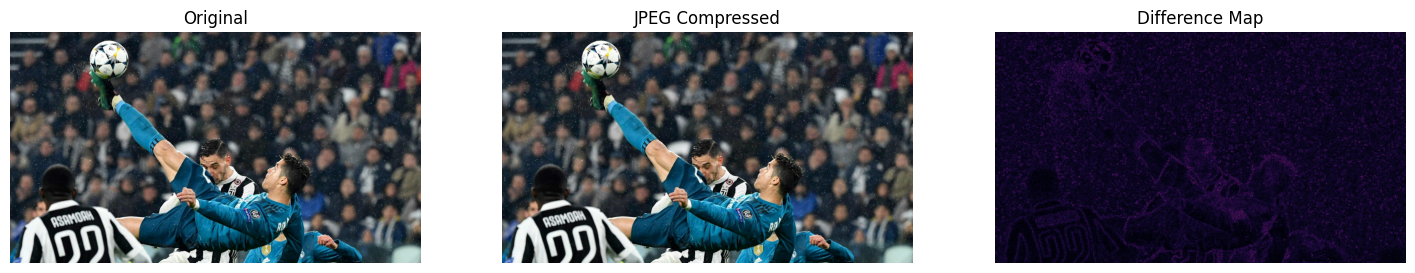

In [52]:
# Display original, compressed, and difference
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(original_rgb.astype(np.uint8))
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(compressed_rgb.astype(np.uint8))
plt.title("JPEG Compressed")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(diff, cmap='inferno')
plt.title("Difference Map")
plt.axis("off")

plt.show()
